In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import pathlib as Path
import json

In [2]:
def find_json_file(directory):
    """
    Find a JSON file in a directory (and its subdirectories) and load it into a dictionary.
    
    Parameters:
        directory (str): Path to the directory to search.
    
    Returns:
        dict or None: Dictionary containing the JSON data if a file is found, 
                      None otherwise.
    """
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            if file_name.endswith('.json'):
                file_path = os.path.join(root, file_name)
                with open(file_path, 'r') as file:
                    try:
                        json_data = json.load(file)
                        return json_data
                    except json.JSONDecodeError:
                        print(f"Error: JSON decode failed for file '{file_path}'")
    print("No JSON file found in the directory.")
    return None

In [3]:
# Path
dir_path = r"/kaggle/input/2dcnn-ds2/2DCNN_ds2"   

# Check if the path exists
if os.path.exists(dir_path):
    print(f"The path '{dir_path}' exists.")
else:
    print(f"The path '{dir_path}' does not exist.")

The path '/kaggle/input/2dcnn-ds2/2DCNN_ds2' exists.


In [4]:
# importing data
event_types = {1:'GRB',2:'TGF',3:'SGR',4:'SFLARE'}

test_dir = os.path.join(dir_path,"test")  
train_dir = os.path.join(dir_path,"train")

# Replace 'your_search_string' with the string you are looking for in file names
search_string = 'bn'

search_pattern = os.path.join(test_dir, f'*{search_string}*')
test_files = glob.glob(search_pattern)

search_pattern = os.path.join(train_dir, f'*{search_string}*')
train_files = glob.glob(search_pattern)

json_data = find_json_file(dir_path)
print(json_data)

{'bin list': [0.016, 0.064, 0.256, 1.024, 4.096], 'time interval': [-20, 100], 'number of data points': 'n/a', 'data set name': '2DCNN_ds2', 'data set path': 'C:\\Users\\arpan\\OneDrive\\Documents\\GRB\\data\\2DCNN_ds2'}


In [5]:
print(len(test_files))
print(test_files[:10])

print(len(train_files))
print(train_files[:10])


784
['/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/GRB_bn170113420', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/SFLARE_bn141216438', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/SFLARE_bn131029420', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/SGR_bn221013037d', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/GRB_bn171010875', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/SGR_bn160715298', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/GRB_bn220407167', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/TGF_bn140628393', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/TGF_bn180607061', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/test/TGF_bn180922713']
3200
['/kaggle/input/2dcnn-ds2/2DCNN_ds2/train/SGR_bn160626724', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/train/GRB_bn230911329', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/train/TGF_bn160416676', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/train/GRB_bn150322066', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/train/GRB_bn120312671', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/train/TGF_bn110606097', '/kaggle/input/2dcnn-ds2/2DCNN_ds2/train/SFLARE_

In [6]:
# Calculating the number of points in each binnning
bin_list = json_data['bin list']
ti = json_data['time interval']
bin_edges_list = []

for i in bin_list:
    bin_edges_list.append(np.arange(ti[0],ti[-1],i))

dno_list = [len(l)-1 for l in bin_edges_list]

data_total = sum(dno_list)
check_data = np.loadtxt(train_files[1], delimiter='\t').astype(np.int32)
len_data = len(check_data)

print(dno_list)
if data_total == len_data and len(dno_list) == len(bin_list):
    print('bin edges calculated correctly')
else:
    print('inconsistency in bin edges calculated and data')

[7499, 1874, 468, 117, 29]
bin edges calculated correctly


In [7]:
f = 0
for i in dno_list:
    print(check_data[f:f+i])
    f =f + i

[19 10 22 ... 24 23 18]
[69 82 78 ... 94 90 70]
[ 312  306  290  333  284  326  293  284  285  316  295  319  296  281
  295  286  276  306  284  294  312  290  326  315  295  277  298  313
  286  317  312  291  266  336  313  275  314  327  317  301  326  302
  300  320  315  290  291  278  280  286  306  235  281  268  304  311
  292  287  301  291  297  321  306  283  303  272  310  306  324  325
  300  274  350  332  345  332  344  372  391  355  391  374  378  463
  457  460  500  535  522  476  505  506  557  501  549  545  567  570
  556  509  540  506  530  582  594  554  504  517  588  569  546  520
  538  539  534  607  558  600  761  698  621  626  629  661  623  672
  722  808  591  495  546  590  680  788  799  798  714  712  755  671
  748  913 1113  966  846  690  932  939  848  605  508  448  401  386
  412  404  712  974  983  904  895  633  833  818  557  515  485  489
  545  667  500  569  930  637  893  720  903  754  620  524  466  530
  662  610  484  420  437  44

In [9]:

def process_file(file, X,Y,event_counter,dno_list = dno_list):
    """
    takes a file and processes it and adds it to the data set
    file:path to the file to be processed
    X:data set to be added to
    Y:list of labels of data
    dno_list:list of number of data points in each binning as calculated previously
    
    returns updated X and Y and event_counter
    """
    # fetching data from file and checking if label is considered
    event_type , event_name = file.split('/')[-1].split('_')
    loaded_data = np.loadtxt(file, delimiter='\t').astype(np.int32)
    if event_type not in event_counter.keys():
        return X,Y,event_counter
    
    y = [0,0,0,0]
    
    # setting and updating Y
    for key,value in event_types.items():
        if value in file.split('\\')[-1]:
            y[key-1] = 1
            Y.append(y)
            event_counter[value] += 1

    # setting and updating X
    f = 0
    for k,dno in zip(X.keys(),dno_list):
        X[k].append(loaded_data[f:f+dno])
        f = f + dno
        
    return X,Y,event_counter

In [10]:
# initializing train and test sets
X_train = {str(key): [] for key in bin_list}
Y_train = []
train_event_counter = {'GRB':0,'TGF':0,'SGR':0,'SFLARE':0}

X_test = {str(key): [] for key in bin_list}
Y_test = []
test_event_counter = {'GRB':0,'TGF':0,'SGR':0,'SFLARE':0}

# print(process_file(train_files[1],X_train,Y_train,train_event_counter))

# processing train and test data sets
for file in train_files:
    X_train,Y_train,train_event_counter = process_file(file,X_train,Y_train,train_event_counter)
print('training events\n',train_event_counter)
print('total events : ', sum([i for i in train_event_counter.values()]))
Y_train = np.array(Y_train)
print('shape of Y_train', Y_train.shape)
print('shape of X_train dictionary:')
for i in X_train.keys():
    X_train[i] = np.array(X_train[i])
    X_train[i] = np.reshape(X_train[i], X_train[i].shape + tuple([1]))
    print(type(X_train[i]),X_train[i].shape)

for file in test_files:
    X_test,Y_test,test_event_counter = process_file(file,X_test,Y_test,test_event_counter)
print('testing events\n',test_event_counter)
print('total events : ', sum([i for i in test_event_counter.values()]))
Y_test = np.array(Y_test)
print('shape of Y_test', Y_test.shape)
print('shape of X_test dictionary:')
for i in X_test.keys():
    X_test[i] = np.array(X_test[i])
    X_test[i] = np.reshape(X_test[i], X_test[i].shape + tuple([1]))
    print(type(X_test[i]),X_test[i].shape)




training events
 {'GRB': 800, 'TGF': 800, 'SGR': 800, 'SFLARE': 800}
total events :  3200
shape of Y_train (3200, 4)
shape of X_train dictionary:
<class 'numpy.ndarray'> (3200, 7499, 1)
<class 'numpy.ndarray'> (3200, 1874, 1)
<class 'numpy.ndarray'> (3200, 468, 1)
<class 'numpy.ndarray'> (3200, 117, 1)
<class 'numpy.ndarray'> (3200, 29, 1)
testing events
 {'GRB': 200, 'TGF': 200, 'SGR': 184, 'SFLARE': 200}
total events :  784
shape of Y_test (784, 4)
shape of X_test dictionary:
<class 'numpy.ndarray'> (784, 7499, 1)
<class 'numpy.ndarray'> (784, 1874, 1)
<class 'numpy.ndarray'> (784, 468, 1)
<class 'numpy.ndarray'> (784, 117, 1)
<class 'numpy.ndarray'> (784, 29, 1)


In [11]:
import numpy as np
from scipy.interpolate import interp1d

def augment_timeseries_data(train_data, train_labels, augmentation_factor=2):
    """
    Perform data augmentation on a time series training set stored as a dictionary, including labels.
    
    Args:
    train_data (dict): A dictionary containing input data for multiple layers.
                       Each key corresponds to an input layer, and its value
                       is a numpy array of shape (samples, time_steps, features).
    train_labels (numpy.ndarray): Labels corresponding to the training data.
    augmentation_factor (int): The factor by which to increase the dataset size.
    
    Returns:
    tuple: (augmented_data, augmented_labels)
    """
    
    augmented_data = {}
    augmented_labels = []
    
    def time_warp(x, sigma=0.2, knot=4):
        orig_steps = np.arange(x.shape[1])
        random_warps = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, x.shape[2]))
        warp_steps = np.linspace(0, x.shape[1]-1., num=knot+2)
        ret = np.zeros_like(x)
        for i in range(x.shape[2]):
            warper = interp1d(warp_steps, random_warps[:, i], kind='linear')
            warped_steps = warper(orig_steps)
            for j in range(x.shape[0]):
                ret[j, :, i] = np.interp(orig_steps, warped_steps, x[j, :, i])
        return ret

    def magnitude_warp(x, sigma=0.2, knot=4):
        orig_steps = np.arange(x.shape[1])
        random_warps = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, x.shape[2]))
        warp_steps = np.linspace(0, x.shape[1]-1., num=knot+2)
        ret = np.zeros_like(x)
        for i in range(x.shape[2]):
            warper = interp1d(warp_steps, random_warps[:, i], kind='linear')
            warped_steps = warper(orig_steps)
            for j in range(x.shape[0]):
                ret[j, :, i] = x[j, :, i] * warped_steps
        return ret

    def window_slice(x, reduce_ratio=0.9):
        target_len = int(reduce_ratio * x.shape[1])
        if target_len >= x.shape[1]:
            return x
        starts = np.random.randint(0, x.shape[1] - target_len, size=(x.shape[0])).astype(int)
        ends = (target_len + starts).astype(int)
        
        ret = np.zeros_like(x)
        for i, (start, end) in enumerate(zip(starts, ends)):
            for j in range(x.shape[2]):
                ret[i, :, j] = np.interp(np.linspace(0, target_len, num=x.shape[1]), 
                                         np.arange(target_len), 
                                         x[i, start:end, j])
        return ret

    for layer_name in train_data.keys():
        layer_data = train_data[layer_name]
        augmented_layer_data = [layer_data]
        
        for _ in range(augmentation_factor - 1):
            aug_data = layer_data.copy()
            if np.random.rand() > 0.5:
                aug_data = time_warp(aug_data)
            if np.random.rand() > 0.5:
                aug_data = magnitude_warp(aug_data)
            if np.random.rand() > 0.5:
                aug_data = window_slice(aug_data)
            
            augmented_layer_data.append(aug_data)
        
        augmented_data[layer_name] = np.concatenate(augmented_layer_data, axis=0)
    
    # Replicate labels for each augmented version
    augmented_labels = np.tile(train_labels, (augmentation_factor, 1))
    
    return augmented_data, augmented_labels

X_train_aug,Y_train_aug = augment_timeseries_data(X_train,Y_train,augmentation_factor=2)

print(Y_train_aug.shape)       

for key in X_train_aug.keys():
    print(f"Shape of X_train_aug['{key}']: {X_train_aug[key].shape}")


(6400, 4)
Shape of X_train_aug['0.016']: (6400, 7499, 1)
Shape of X_train_aug['0.064']: (6400, 1874, 1)
Shape of X_train_aug['0.256']: (6400, 468, 1)
Shape of X_train_aug['1.024']: (6400, 117, 1)
Shape of X_train_aug['4.096']: (6400, 29, 1)


In [12]:
from keras.models import Model
from keras.layers import Dense, concatenate,Input, Conv1D,BatchNormalization,Flatten,Dropout, Reshape, Conv2D, MaxPooling1D
from tensorflow.keras.optimizers import schedules, Adam, Adamax
import math

def create_input_layers(data_dict):
    """
    Create input layers and Conv1D layers based on the number of entries in the dictionary and the shape of the lists in the dictionary.
    
    Parameters:
        data_dict (dict): Dictionary containing dataset names as keys and dataset lists as values.
    
    Returns:
        list: List of input layers.
        list: List of Conv1D layers.
    """
    input_layers = []
    conv_layers = []
    layer_count = 0
    for dataset_name, dataset_list in data_dict.items():
        
        input_shape = tuple([len(dataset_list[0]),1])  # Assuming all lists have the same length
        
        input_layer = Input(shape=input_shape, name=str(dataset_name))
        
        norm = BatchNormalization()(input_layer)  # Add a BatchNormalization layer after each input layer
        
        filter_size = 64
        kernel_size = 32    
        if input_shape[0] < 4:
            filter_size = 2
            kernel_size = 1
        elif input_shape[0] < 8:
            filter_size = 4
            kernel_size = 2
        elif input_shape[0] < 16:
            filter_size = 8
            kernel_size = 4
        elif input_shape[0] < 32:
            filter_size = 16
            kernel_size = 8
        elif input_shape[0] < 64:
            filter_size = 32
            kernel_size = 16
        
        s = norm.shape[1]
        m = (math.floor(np.log10(abs(s))+1))
        d = 0.1 * (m*2-3 )
        stride = m*2-3
        if stride < 1:
            stride = 1
        if d < 0:
            d = 0.1
        print('name',dataset_name)
        print('m', m)
        print('dropout',d)
        print('strides',stride)
        
        conv1 = Conv1D(filters = filter_size, kernel_size = kernel_size,strides = stride, activation='selu')(norm)  # Add a Conv1D layer after the Dropout layer
        
        dropout1 = Dropout(d)(conv1)
        
        flat = Flatten()(dropout1)
        
        dense = Dense(64, activation = 'mish')(flat) 
        
        d2 = Dropout(0.75)(dense)
        
        input_layers.append(input_layer)
        
        conv_layers.append(d2)
        
        layer_count = layer_count + 1
        
    return input_layers, conv_layers, layer_count

def build_model(data_dict):
    """
    Build a Keras model using input layers based on the number of entries in the dictionary and the shape of the lists in the dictionary.
    
    Parameters:
        data_dict (dict): Dictionary containing dataset names as keys and dataset lists as values.
    
    Returns:
        keras.models.Model: Keras model.
    """
    input_layers, conv_layers, layer_count = create_input_layers(data_dict)
    
    # Concatenate Conv1D layers
    merged = concatenate(conv_layers, axis = -1)
    
    reshaped = Reshape((len(data_dict), 64, 1))(merged)
    
    # Conv2D layer
    conv2d = Conv2D(64, (layer_count, layer_count ), activation='selu')(reshaped)

    # Flatten
    flattened = Flatten()(conv2d)
    
    # Dropout
    drop = Dropout(0.75)(flattened)
    
    # Add dense layers
    dense = Dense(1024,activation = 'relu')(drop)
    output = Dense(4, activation='softmax')(dense)  # Example output layer
    
    # Create the model
    model = Model(inputs=input_layers, outputs=output)
    
    return model

# Build the model
model = build_model(X_train)

# Print model summary
model.summary()

# def optimizer
opt = Adam(learning_rate=0.00001,beta_1=0.8)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



2024-08-13 17:32:06.077467: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 17:32:06.077583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 17:32:06.222026: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


name 0.016
m 4
dropout 0.5
strides 5
name 0.064
m 4
dropout 0.5
strides 5
name 0.256
m 3
dropout 0.30000000000000004
strides 3
name 1.024
m 3
dropout 0.30000000000000004
strides 3
name 4.096
m 2
dropout 0.1
strides 1


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ 0.016 (InputLayer)  │ (None, 7499, 1)   │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 0.064 (InputLayer)  │ (None, 1874, 1)   │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 0.256 (InputLayer)  │ (None, 468, 1)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 1.024 (InputLayer)  │ (None, 117, 1)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ 4.096 (InputLayer)  │ (None, 29, 1)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 7499, 1)   │          4 │ 0.016[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1874, 1)   │          4 │ 0.064[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 468, 1)    │          4 │ 0.256[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 117, 1)    │          4 │ 1.024[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 29, 1)     │          4 │ 4.096[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1494, 64)  │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 369, 64)   │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 146, 64)   │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 29, 64)    │      2,112 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 22, 16)    │        144 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1494, 64)  │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 369, 64)   │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 146, 64)   │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 29, 64)    │          0 │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 22, 16)    │          0 │ conv1d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 95616)     │          0 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 23616)     │          0 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 12,318,056 (46.99 MB)

 Trainable params: 12,318,046 (46.99 MB)

 Non-trainable params: 10 (40.00 B)

In [13]:
from keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import Callback

class CustomEarlyStopping(Callback):
    def __init__(self, threshold=0.85, patience=2):
        super(CustomEarlyStopping, self).__init__()
        self.threshold = threshold
        self.patience = patience
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        current = logs.get('accuracy')
        if current is None:
            return

        if current >= self.threshold:
            self.wait += 1
            if self.wait >= self.patience:
                self.model.stop_training = True
        else:
            self.wait = 0

custom_early_stopping = CustomEarlyStopping()

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2000)

# Train the model
history = model.fit(X_train_aug, Y_train_aug, epochs=1000, batch_size=128, validation_split=0.3, callbacks=[custom_early_stopping,early_stopping])

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.3868 - loss: 1.3418 - val_accuracy: 0.2589 - val_loss: 5.7613
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 422ms/step - accuracy: 0.4514 - loss: 1.1491 - val_accuracy: 0.2917 - val_loss: 1.3064
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 411ms/step - accuracy: 0.4884 - loss: 1.0729 - val_accuracy: 0.4172 - val_loss: 1.2167
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.5167 - loss: 1.0532 - val_accuracy: 0.5516 - val_loss: 0.9841
Epoch 5/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 430ms/step - accuracy: 0.5114 - loss: 1.1117 - val_accuracy: 0.5849 - val_loss: 0.9799
Epoch 6/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 439ms/step - accuracy: 0.5257 - loss: 1.0148 - val_accuracy: 0.6104 - val_loss: 0.9011
Epoch 7/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.5881 - loss: 0.9724 - val_accuracy: 0.5917 - val_loss: 0.8596
Epoch 8/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 21s 438ms/step - accuracy: 0.5856 - loss: 0

In [14]:
n_epochs = len(history.history['loss'])

print(f"The model was trained for {n_epochs} epochs.")

# Evaluate the model on the train set  
test_loss, test_acc = model.evaluate(X_train, Y_train,verbose=2)
print(f'\nTest accuracy on training data: {test_acc} \n \n')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print(f'\nTest accuracy on test data: {test_acc}\n \n')

The model was trained for 54 epochs.
100/100 - 3s - 28ms/step - accuracy: 0.9019 - loss: 0.3094

Test accuracy on training data: 0.9018750190734863 
 

25/25 - 1s - 24ms/step - accuracy: 0.8533 - loss: 0.5178

Test accuracy on test data: 0.8533163070678711
 



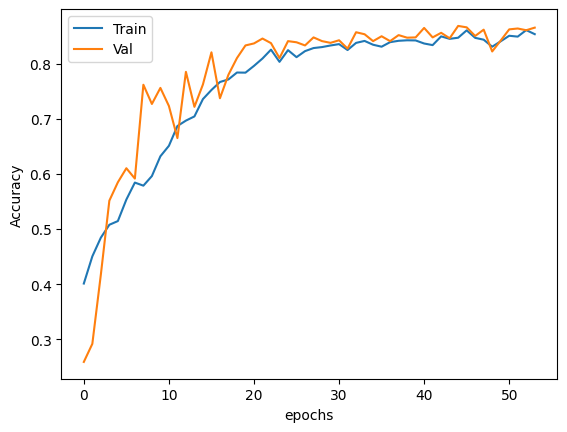

In [15]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(n_epochs)], history.history['accuracy'],label='Train')
plt.plot([i for i in range(n_epochs)], history.history['val_accuracy'],label='Val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

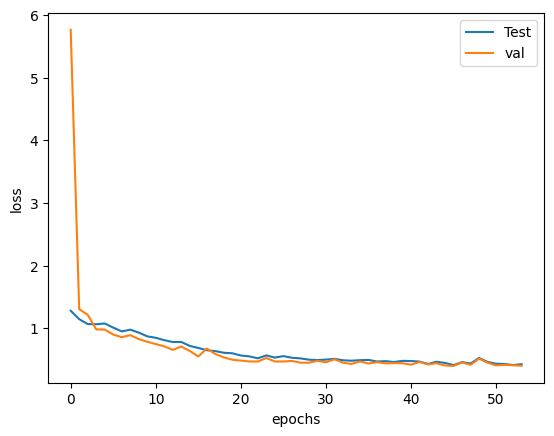

In [16]:
plt.plot([i for i in range(n_epochs)], history.history['loss'],label='Test')
plt.plot([i for i in range(n_epochs)], history.history['val_loss'],label='val')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


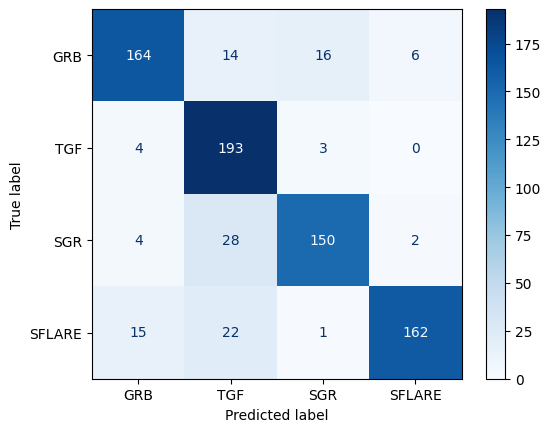

dict_keys(['GRB', 'TGF', 'SGR', 'SFLARE'])


In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_prediction = model.predict(X_test)
test_predicted_label = np.argmax(test_prediction, axis=1)
test_actual_label = np.argmax(Y_test, axis = 1)
conf_m = confusion_matrix(test_actual_label, test_predicted_label)

conf_m_show = ConfusionMatrixDisplay(confusion_matrix = conf_m,display_labels=['GRB','TGF','SGR','SFLARE'])
conf_m_show.plot(include_values=True, cmap='Blues',ax = None, xticks_rotation= 'horizontal')
plt.show()
print(train_event_counter.keys())

In [18]:
# saving the model   
model.save('/kaggle/working/CNN2d.keras')


In [19]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink('CNN2d.keras')

/kaggle/working


/kaggle/working/CNN2d.keras

In [20]:
import pandas as pd

def model_out(model, X, Y):
    preds = []
    bkgd_int = [(0, 0), (0, 0)]
    poly_column = np.array([0, 0])
    sig = 0.0
    bin_size = '1'

    x_col = []
    y_col = []
    event_types = []
    event_names = []

    if isinstance(X, dict):
        for n in range(len(Y)):
            x = {}
            for key in X.keys():
                arr = X[key][n]
                arr = arr.reshape(1, arr.shape[0], arr.shape[-1])
                x[key] = arr
            y = Y[n].tolist()

            y_pred = model.predict(x, verbose=0).tolist()[0]

            x_col.append(x)
            y_col.append(y)
            preds.append(y_pred)
    else:
        print('need dict')
        return None

    # Create the DataFrame
    df = pd.DataFrame({
        'x': x_col,
        'y': y_col,
        'prediction': preds,
        
    })

    return df,preds

df,preds = model_out(model, X_test, Y_test)
print('value counts',df['y'].value_counts())



value counts y
[1, 0, 0, 0]    200
[0, 0, 0, 1]    200
[0, 1, 0, 0]    200
[0, 0, 1, 0]    184
Name: count, dtype: int64


In [21]:
def calculate_cnn_precision_multiclass(y_true, y_pred):
    """
    Calculate the precision of a CNN model for a 4-class classifier using one-hot encoding.
    
    Args:
    y_true (numpy.ndarray): Ground truth labels (one-hot encoded)
    y_pred (numpy.ndarray): Predicted probabilities for each class
    
    Returns:
    numpy.ndarray: Precision score for each class
    float: Average precision across all classes
    """
    
    # Convert predicted probabilities to class predictions
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Number of classes
    num_classes = y_true.shape[1]
    
    # Initialize arrays to store true positives and predicted positives
    true_positives = np.zeros(num_classes)
    predicted_positives = np.zeros(num_classes)
    
    # Calculate true positives and predicted positives for each class
    for i in range(num_classes):
        true_positives[i] = np.sum((np.argmax(y_true, axis=1) == i) & (y_pred_classes == i))
        predicted_positives[i] = np.sum(y_pred_classes == i)
    
    # Calculate precision for each class
    precision = true_positives / (predicted_positives + 1e-7)
    
    # Calculate average precision
    average_precision = np.mean(precision)
    
    return precision, average_precision

def calculate_cnn_recall_multiclass(y_true, y_pred):
    """
    Calculate the recall of a CNN model for a 4-class classifier using one-hot encoding.
    
    Args:
    y_true (numpy.ndarray): Ground truth labels (one-hot encoded)
    y_pred (numpy.ndarray): Predicted probabilities for each class
    
    Returns:
    numpy.ndarray: Recall score for each class
    float: Average recall across all classes
    """
    
    # Convert predicted probabilities to class predictions
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Number of classes
    num_classes = y_true.shape[1]
    
    # Initialize arrays to store true positives and actual positives
    true_positives = np.zeros(num_classes)
    actual_positives = np.zeros(num_classes)
    
    # Calculate true positives and actual positives for each class
    for i in range(num_classes):
        true_positives[i] = np.sum((np.argmax(y_true, axis=1) == i) & (y_pred_classes == i))
        actual_positives[i] = np.sum(np.argmax(y_true, axis=1) == i)
    
    # Calculate recall for each class
    recall = true_positives / (actual_positives + 1e-7)
    
    # Calculate average recall
    average_recall = np.mean(recall)
    
    return recall, average_recall

def calculate_cnn_f1_score_multiclass(y_true, y_pred):
    """
    Calculate the F1 score of a CNN model for a 4-class classifier using one-hot encoding.
    
    Args:
    y_true (numpy.ndarray): Ground truth labels (one-hot encoded)
    y_pred (numpy.ndarray): Predicted probabilities for each class
    
    Returns:
    numpy.ndarray: F1 score for each class
    float: Average F1 score across all classes
    """
    
    # Calculate precision and recall
    precision, _ = calculate_cnn_precision_multiclass(y_true, y_pred)
    recall, _ = calculate_cnn_recall_multiclass(y_true, y_pred)
    
    # Calculate F1 score for each class
    f1_score = 2 * (precision * recall) / (precision + recall + 1e-7)
    
    # Calculate average F1 score
    average_f1_score = np.mean(f1_score)
    
    return f1_score, average_f1_score

def calculate_cnn_accuracy_multiclass(y_true, y_pred):
    """
    Calculate the accuracy of a CNN model for a 4-class classifier using one-hot encoding.
    
    Args:
    y_true (numpy.ndarray): Ground truth labels (one-hot encoded)
    y_pred (numpy.ndarray): Predicted probabilities for each class
    
    Returns:
    numpy.ndarray: Accuracy score for each class
    float: Overall accuracy across all classes
    """
    
    # Convert predicted probabilities to class predictions
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_true, axis=1)
    
    # Number of classes
    num_classes = y_true.shape[1]
    
    # Initialize arrays to store correct predictions and total predictions
    correct_predictions = np.zeros(num_classes)
    total_predictions = np.zeros(num_classes)
    
    # Calculate correct predictions and total predictions for each class
    for i in range(num_classes):
        correct_predictions[i] = np.sum((y_true_classes == i) & (y_pred_classes == i))
        total_predictions[i] = np.sum(y_true_classes == i)
    
    # Calculate accuracy for each class
    class_accuracy = correct_predictions / (total_predictions + 1e-7)
    
    # Calculate overall accuracy
    overall_accuracy = np.sum(correct_predictions) / len(y_true_classes)
    
    return class_accuracy, overall_accuracy

In [22]:
class_acc,overall_acc = calculate_cnn_accuracy_multiclass(Y_test,preds)
pre, avg_pre = calculate_cnn_precision_multiclass(Y_test,preds)
recall, average_reacall = calculate_cnn_recall_multiclass(Y_test,preds)
f1_score, average_f1_score = calculate_cnn_f1_score_multiclass(Y_test,preds)

In [23]:
from tabulate import tabulate
import numpy as np

metrics = [
    ["Accuracy"] + list(class_acc) + [overall_acc],
    ["Precision"] + list(pre) + [avg_pre],
    ["Recall"] + list(recall) + [average_reacall],
    ["F1 Score"] + list(f1_score) + [average_f1_score]
]

headers = ["Metric", "GRB", "TGF", "SGR", "SFLARE", "Overall/Average"]
table = tabulate(metrics, headers=headers, tablefmt="grid")
print('metric calculed on test data')
print(table)

metric calculed on test data
+-----------+----------+----------+----------+----------+-------------------+
| Metric    |      GRB |      TGF |      SGR |   SFLARE |   Overall/Average |
+===========+==========+==========+==========+==========+===================+
| Accuracy  | 0.82     | 0.965    | 0.815217 | 0.81     |          0.853316 |
+-----------+----------+----------+----------+----------+-------------------+
| Precision | 0.877005 | 0.750973 | 0.882353 | 0.952941 |          0.865818 |
+-----------+----------+----------+----------+----------+-------------------+
| Recall    | 0.82     | 0.965    | 0.815217 | 0.81     |          0.852554 |
+-----------+----------+----------+----------+----------+-------------------+
| F1 Score  | 0.847545 | 0.844639 | 0.847458 | 0.875676 |          0.853829 |
+-----------+----------+----------+----------+----------+-------------------+
